# Домашнее задание №2

**Выполнено Елизаветой Дербеневой**

# Создание и разметка корпуса

Корпус для оценки работы теггеров должен включать в себя большое количество "сложных" слов. К таким словам можно отнести:
* слова с неизвестными корнями, но образованные с помощью продуктивных моделей, т.е. частотных словообразовательных/словоизменительных морфем;
* омонимия;
* редкие и нестандартные формы слов, которые не соответствуют норме (*победю* и т.п.);
* аббревиатуры и различие редкие термины.

Для создания корпуса использовались детские тексты из базы данных ["Дети-инофоны Вологодской области"](https://inophone35.ru/), тексты из [КРУТ](http://web-corpora.net/CoRST/search/index.php?interface_language=ru) и подкорпуса НКРЯ "Социальные сети". Данные источники содержат разнообразную лексику, в том числе ошибочно образованные формы.

In [782]:
with open('корпус.txt', 'r') as f:
    corpus = f.readlines()

In [783]:
corpus

['Изредка скворцы возвращаются к своим домам, покружатся в воздухе, просядут на ветки около скворещников, просвищат какой-нибуть новый матив и улетит.\n',
 'Только иногда раздается звук падующих шишик.\n',
 'На другой день Витя предложыл пойдёте за грибами ребята!\n',
 'Чернолебяжья динамика – это цепь самых важных событий.\n',
 "Да и содержимое баночек не уступает оформлению, а некоторые сорта и вовсе становятся общепризнанными ТОП'ами.  Вот один такой излюбленный нами Смузи мы и подключили на кран.  Да-да, тот самый, с дракончиком! Фо-бо ― новый «Спешл» нашего меню.\n",
 'Каюты поразили моё воображение, так как привыкнув к парусным яхтам, где всё очень эргономично...\n',
 'Комфортная стоматология не хуже массажа или спа, а порой так же приятна, например, если вы выбираете отбеливание или профгигиену, то получаете пользу в тот же день.\n',
 'Какое нарушение ПДД совершил ученик сегодня на Обручевском кольце?\n',
 'Это гарантирует устойчивое водообеспечение сельскохозяйственных нужд суб

Получившийся корпус включает в себя аббревиатуры (ПДД, ВГПУ, ЗАГСа, МФТИ), словоформы с ошибочным написанием (просвищат, какой-нибуть, матив), слова с неизвестными/малоизвестными корнями (тишку, мерч, н-мерности), словоформы с дефисом (жилищно-коммунальное), омонимия (пила) и др.

Для разметки были выбраны три POS теггера для русского языка:
*   natasha,
*   pymorphy,
*   mystem.

Наборы тегов у данных теггеров различаются, поэтому была создана универсальная разметка, которая использовалась при сравнении и с помощью которой был размечен тестовый корпус. Разметка основывается на Universal POS tags, поскольку именно этот тегсет имеет более общие теги, а также он используется в одном из рассматриваемых теггеров (natasha). Различия между теггерами были разрешены следующим образом:

* ADJF и ADJS отнесены к ADJ
* Сравнительная степень прилагательных/наречий -> COMP
* Инфинитивы, причастия, деепричастия -> VERB
* CCONJ и SCONJ объединены как CONJ
* местоимения-прилагательные -> ADJ
* местоимения-наречия -> ADV
* местоимения-существительные -> PRON
* детерминативы вроде "свой", "тот" -> ADJ
* ADP -> PREP
* Имена собственные -> NOUN
* Вводные слова, предикативы -> ADV
* AUX -> VERB

Таким образом, итоговый набор тегов:
* ADJ	прилагательное
* ADV	наречие
* CONJ союз
* COMP сравнительная степень прилагательных/наречий
* INTJ междометие
* NOUN существительное
* NUM числительное
* PART частица
* PREP предлог
* PRON местоимение-существительное
* VERB глагол (включая инфинитивы, причастия, деепричастия)




Получившийся корпус находится в файле 'корпус.txt'. Размеченный корпус в файле - 'corpus_tagged.csv'.

In [784]:
import pandas as pd

In [785]:
corpus_tagged = pd.read_csv('corpus_tagged.csv', sep=';')

In [786]:
corpus_tagged

,words,tags
0,Изредка,ADV
1,скворцы,NOUN
2,возвращаются,VERB
3,к,PREP
4,своим,ADJ
...,...,...
240,Пила,NOUN
241,шла,VERB
242,не,PART
243,так,ADV


# Разметка корпуса с помощью 3 теггеров

## PyMorphy

In [787]:
!pip install pymorphy2

Для токенизации текста используем nltk

In [788]:
from nltk import word_tokenize
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [789]:
from pymorphy2 import MorphAnalyzer

morph = MorphAnalyzer()

Функция для приведения тегов к "единому стандарту":

In [790]:
def pymorphy_tags(tag):
  if tag == 'ADJF' or tag == 'ADJS':
      new_tag = 'ADJ'
  elif tag == 'ADVB' or tag == 'PRED':
      new_tag = 'ADV'
  elif tag == 'INFN' or tag == 'PRTF' or tag == 'PRTS' or tag == 'GRND':
      new_tag = 'VERB'
  elif tag == 'NUMB':
      new_tag = 'NUM'
  elif tag == 'NPRO':
      new_tag = 'PRON'
  elif tag == 'PRCL':
      new_tag = 'PART'
  else:
      new_tag = tag
  return new_tag

In [791]:
tagged_pymorphy = dict()

for line1 in corpus:
    words1 = word_tokenize(line1)
    for word1 in words1:
        tag1 = pymorphy_tags(str(morph.parse(word1)[0].tag).split(',')[0].split(' ')[0])
        if tag1 != 'PNCT':
            tagged_pymorphy.update({word1 : tag1})

In [792]:
def dict_to_pd(my_dict):
    words = my_dict.keys()
    tags = my_dict.values()
    data = {'words' : words,
            'tags' : tags}
    df = pd.DataFrame.from_dict(data)
    return df

In [793]:
df_pymorphy = dict_to_pd(tagged_pymorphy)
df_pymorphy.head()

,words,tags
0,Изредка,ADV
1,скворцы,NOUN
2,возвращаются,VERB
3,к,PREP
4,своим,ADJ


## MyStem

In [794]:
!pip install pymystem3

In [795]:
from pymystem3 import Mystem

mystem = Mystem()

In [796]:
def mystem_tags(tag):
    if tag == 'A' or tag == 'APRO':
        new_tag = 'ADJ'
    elif tag == 'ADVPRO':
        new_tag = 'ADV'
    elif tag == 'ANUM':
        new_tag = 'NUM'
    elif tag == 'PR':
        new_tag = 'PREP'
    elif tag == 'S':
        new_tag = 'NOUN'
    elif tag == 'SPRO':
        new_tag = 'PRON'
    elif tag == 'V':
        new_tag = 'VERB'
    else:
        new_tag = tag
    return new_tag

In [797]:
import re

In [798]:
tagged_mystem = dict()

for line2 in corpus:
    words2 = mystem.analyze(line2)
    for word2 in words2:
        w2 = word2.get('analysis')
        if w2 != None and len(w2) != 0:
            pre_tag2 = w2[0]['gr'].split(',')[0]
            if pre_tag2 == 'A=срав' or pre_tag2 == 'ADV=срав':
                tag2 = 'COMP'
            else:
                tag2 = mystem_tags(re.sub(r"[^A-Za-z]+", '', w2[0]['gr'].split(',')[0]))
            if tag2 != 'PNCT':
                tagged_mystem.update({word2['text'] : tag2})

In [799]:
df_mystem = dict_to_pd(tagged_mystem)
df_mystem.head()

,words,tags
0,Изредка,ADV
1,скворцы,NOUN
2,возвращаются,VERB
3,к,PREP
4,своим,ADJ


При токенизации mystem разделяет некоторые слова по дефису (ТОП-ами и н-мерности). Это будет учтено при подсчёте accuracy: при верном определении части речи у одной из частей словоформы она будет засчитываться за верную.

## Natasha

In [800]:
! pip install natasha

In [801]:
from natasha import (
    Segmenter,
    MorphVocab,

    NewsEmbedding,
    NewsMorphTagger,
    Doc
)


segmenter = Segmenter()
morph_vocab = MorphVocab()

emb = NewsEmbedding()
morph_tagger = NewsMorphTagger(emb)

In [802]:
corpus_text = ' '.join(corpus).replace('\n', '')

In [803]:
doc = Doc(corpus_text)
doc.segment(segmenter)
doc.tag_morph(morph_tagger)

In [804]:
doc

Doc(text="Изредка скворцы возвращаются к своим домам, покру..., tokens=[...], sents=[...])

In [805]:
def natasha_tags(tag):
    if tag == 'ADP':
        new_tag = 'PREP'
    elif tag == 'CCONJ' or tag == 'SCONJ':
        new_tag = 'CONJ'
    elif tag == 'PROPN':
        new_tag = 'NOUN'
    elif tag == 'DET':
        new_tag = 'ADJ'
    elif tag == 'AUX':
        new_tag = 'VERB'
    else:
        new_tag = tag
    return new_tag

In [806]:
tagged_natasha= dict()

for line3 in doc.sents:
    words3 = line3.morph.tokens
    for word3 in words3:
        if word3.feats.get('Degree') == 'Cmp':
            tag3 = 'COMP'
        else:
            tag3 = natasha_tags(word3.pos)
        if tag3 != 'PUNCT':
            tagged_natasha.update({word3.text : tag3})

In [807]:
df_natasha = dict_to_pd(tagged_natasha)
df_natasha.head()

,words,tags
0,Изредка,ADV
1,скворцы,NOUN
2,возвращаются,VERB
3,к,PREP
4,своим,ADJ


Natasha имеет ту же проблему, что и MyStem - она разделяет некоторые слова с дефисом.

# Оценка accuracy для каждого теггера

Ранее результаты разметки всех трех теггеров уже были приведены к общему виду (одинаковому тегсету). Сравним ответы теггеров с размеченным вручную "эталоном".

Для удобства будем работать с получившимся словарями, и "эталонную" разметку тоже преобразуем в словарь.

In [808]:
standard = pd.Series(corpus_tagged.tags.values,index=corpus_tagged.words).to_dict()

In [809]:
len(standard)

211

Формула accuracy будет выглядеть следующим образом:
```
accuracy = количество правильно размеченных словоформ / общее число словоформ
```
Общее число словоформ составляет 211 (в словаре удалены повторения словоформ).

Функция для сравнения двух словарей:

In [810]:
def accuracy(one_dict):
    x = standard
    y = one_dict
    shared = dict()
    not_shared = dict()
    not_found = dict()
    for n in x.keys():
        if n in y.keys():
            if x[n] == y[n]:
                shared.update({n : x[n]})
            else:
                not_shared.update({n : y[n]})
        else:
            not_found.update({n : x[n]})
    return shared, not_shared, not_found

## Accuracy PyMorphy

Количество верно размеченных словоформ:

In [811]:
accuracy_pymorphy = accuracy(tagged_pymorphy)

In [812]:
len(accuracy_pymorphy[0])

192

Ошибки в разметке:

In [813]:
accuracy_pymorphy[1]

{'какой-нибуть': 'VERB',
 'матив': 'VERB',
 'Вот': 'PART',
 'излюбленный': 'VERB',
 'Да-да': 'PART',
 'Фо-бо': 'CONJ',
 'Спешл': 'ADJ',
 'так': 'CONJ',
 'где': 'ADV',
 'всё': 'PART',
 'спа': 'UNKN',
 'например': 'CONJ',
 'Это': 'PART',
 'подчинен': 'ADJ',
 'указанной': 'ADJ',
 'многие': 'PRON',
 'Первый': 'ADJ',
 'более': 'ADV',
 'рада': 'NOUN'}

Часть из этих ошибок можно засчитать за верные ответы:
* *так* содержится в корпусе и как местоименное наречие, и как часть составного союза
* *например* как вводное слово может быть отнесено в категорию союзов

Неразмеченных словоформ нет:

In [814]:
accuracy_pymorphy[2]

{}

In [815]:
194/211

0.919431279620853

Таким образом, PyMorphy дал 194 правильных ответов. Accuracy - 91,94%.

## Accuracy MyStem

In [816]:
accuracy_mystem = accuracy(tagged_mystem)

In [817]:
len(accuracy_mystem[0])

197

In [818]:
accuracy_mystem[1]

{'Только': 'PART',
 'предложыл': 'ADJ',
 'Вот': 'PART',
 'где': 'ADV',
 'порой': 'NOUN',
 'указанной': 'ADJ',
 'более': 'ADV'}

Неразмеченные словоформы:

In [819]:
accuracy_mystem[2]

{'какой-нибуть': 'ADJ',
 "ТОП'ами": 'NOUN',
 'Да-да': 'INTJ',
 'Фо-бо': 'NOUN',
 'н-мерности': 'NOUN',
 '3': 'NUM',
 '10': 'NUM'}

Проверим вручную, как разметил mystem словоформы с дефисом

In [820]:
tagged_mystem['ТОП']

'NOUN'

In [821]:
tagged_mystem['мерности']

'NOUN'

Зачтём их за верные ответы

In [822]:
199/211

0.943127962085308

Accuracy - 94,31%

## Accuracy Natasha

In [823]:
accuracy_natasha = accuracy(tagged_natasha)

In [824]:
len(accuracy_natasha[0])

194

In [825]:
accuracy_natasha[1]

{'просвищат': 'ADJ',
 'Только': 'PART',
 'падующих': 'ADJ',
 'Да': 'CONJ',
 'общепризнанными': 'NOUN',
 'Вот': 'PART',
 'излюбленный': 'VERB',
 'Да-да': 'VERB',
 'где': 'ADV',
 'подчинен': 'ADJ',
 'тишку': 'ADJ',
 'Первый': 'ADJ',
 'вроде': 'PREP',
 '3': 'ADJ',
 'носибельный': 'ADV',
 'А': 'NOUN'}

Не найдены:

In [826]:
accuracy_natasha[2]

{"ТОП'ами": 'NOUN'}

Проверим слова с дефисом:

In [827]:
tagged_natasha['ТОП']

'NOUN'

In [828]:
195/211

0.9241706161137441

Accuracy - 92,42%

Таким образом, наилучшие результаты показал MyStem. Тем не менее, он чуть хуже Наташи справляется с неизвестными словоформами.

# Chunker и его применение к заданию из прошлого дз

Будем извлекать шаблоны:
* **не + VERB**

Такой шаблон часто встречается в отрицательных отзывах. Например: *не советую*, *не могу + INF* и др.

* **ни + разу (+ NOUN) + не + VERB**

Встречается в позитивных отзывах, ср. *ни разу не возникло проблем*, *ни разу косяков не видела*.

* **ни + NOUN + ни + NOUN**

Встречается в негативных отзывах, фразы "ни того ни другого нет", ср. *ни стоимости, ни отправки*, *ни утром, ни вечером* и т.п.


## Программа из дз1

Корпус отзывов из прошлого дз содержится в файле 'comments.csv'.

In [829]:
comments = pd.read_csv('comments.csv', sep='\t').drop(columns=['Unnamed: 0'])

In [830]:
comments.head()

,texts,stars,ton
0,"Ужаснее почты не встречала. Вечные очереди, ещ...",1,0.0
1,"Как так получилось, что центральное отделение ...",1,0.0
2,Исходя из опыта взаимодействия с почтой России...,5,1.0
3,Отделение огонь. Время работы временно до 20:0...,5,1.0
4,Мне нравится это почтовое отделение. Работают ...,5,1.0


In [831]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [832]:
from nltk import word_tokenize
from nltk import sent_tokenize
import string
from string import punctuation

def tokenization(text):
    cleaning = string.punctuation + "\n\xa0«»\t—…" + string.digits + "'‘’"
    new_text = ''

    for ch in text:
        if ch not in cleaning:
            new_text += ch.lower()

    text_tokens = word_tokenize(new_text)
    return text_tokens

In [833]:
def preprocessing(one_text):
    token_text = tokenization(one_text)
    lemma_text = []
    for w in token_text:
        if w not in stopwords.words('russian'):
            lemma_text.append(morph.parse(w)[0].normal_form)
    return lemma_text

In [834]:
train_pos = comments[comments['ton'] == 1][:50]
test_pos = comments[comments['ton'] == 1][50:57]

train_neg = comments[comments['ton'] == 0][:50]
test_neg = comments[comments['ton'] == 0][50:57]

test = pd.concat([test_pos, test_neg])

In [835]:
lemma_pos = preprocessing(''.join(train_pos['texts']))
lemma_neg = preprocessing(''.join(train_neg['texts']))

In [836]:
from collections import Counter

freq_pos = {k: v for k, v in sorted(Counter(lemma_pos).items(), key=lambda item: item[1])}
freq_neg = {k: v for k, v in sorted(Counter(lemma_neg).items(), key=lambda item: item[1])}

In [837]:
clean_freq_pos = []

for elem in freq_pos.items():
    if elem[1] != 1:
        clean_freq_pos.append(elem[0])

In [838]:
clean_freq_neg = []

for eelem in freq_neg.items():
    if eelem[1] != 1:
        clean_freq_neg.append(eelem[0])

In [839]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

Позитивная лексика:

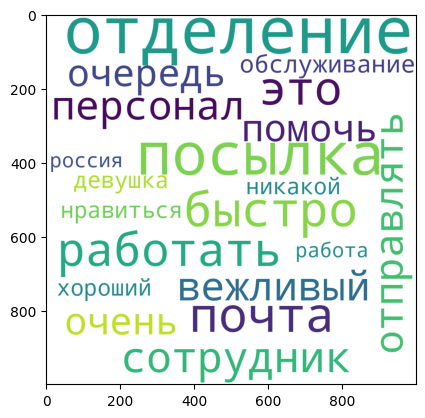

In [840]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(freq_pos)
plt.imshow(wc)

Негативная лексика:

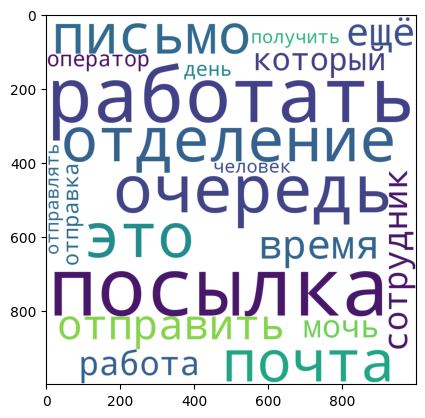

In [841]:
wc = WordCloud(background_color="white",width=1000,height=1000, max_words=20,relative_scaling=0.5,normalize_plurals=False).generate_from_frequencies(freq_neg)
plt.imshow(wc)

In [842]:
set_pos = set(clean_freq_pos)
set_neg = set(clean_freq_neg)

only_pos = set_pos - set_neg
only_neg = set_neg - set_pos

Функция из прошлого ДЗ выглядела так:

In [843]:
def sentiment(review):
    answers = []
    for tt in review:
        cnt_pos = 0
        cnt_neg = 0
        for ww in preprocessing(tt):
            if ww in only_pos:
                cnt_pos += 1
            elif ww in only_neg:
                cnt_neg += 1
        if cnt_pos > cnt_neg:
            answers.append(1)
        else:
            answers.append(0)
    return answers

In [844]:
answers = sentiment(test['texts'].tolist())

In [845]:
test['answers'] = answers

In [846]:
test

,texts,stars,ton,answers
175,Лучшее отделение почты,5,1.0,1
176,Самая адекватна почта в Абакане.,5,1.0,0
177,Дамы в данном почтовом отделении большие молод...,5,1.0,1
178,Присоединяюсь к отзывам. The best!!!,5,1.0,0
179,"Обожаемое отделение, переехали от туда, но все...",5,1.0,1
180,"Доброжелательный персонал , спасибо",5,1.0,1
181,Лучшее почтовое отделение в Абакане. Персонал ...,5,1.0,1
97,Отвратительный персонал,1,0.0,0
98,Не могу дозвониться уже второй день никто не о...,1,0.0,0
103,В 18:00 уже закрыты!!! График до 20:00,1,0.0,0


In [847]:
from sklearn.metrics import accuracy_score
y_pred = test['answers']
y_true = test['ton']
accuracy_score(y_true, y_pred)

0.8571428571428571

Её точность составила 85,7%. Попробуем улучшить алгоритм с помощью chunker'a.

## Chunker и улучшение

In [848]:
def chunker(sent):
    analyzed_sent = mystem.analyze(sent)
    tagged_sent = ''
    neg_feat = 0
    pos_feat = 0
    for slovo in analyzed_sent:
        sl = slovo.get('analysis')
        if sl != None and len(sl) != 0:
            pos_slovo = re.sub(r"[^A-Za-z]+", '', sl[0]['gr'].split(',')[0])
            slovo_tag = slovo['text']+'_'+pos_slovo
            tagged_sent += slovo_tag
        else:
            tagged_sent += slovo['text']
    if len(re.findall(r'[Нн]е\w+\s[А-Яа-яё]+_V', tagged_sent)) != 0:
        neg_feat += 1
    if len(re.findall(r'[Нн]и_\w+\sразу_\w+\s[А-Яа-яё]*_?\w*\s?не_\w+\s[А-Яа-яё]+_V', tagged_sent)) != 0:
        pos_feat += 1
    if len(re.findall(r'[Нн]и_\w+\s[А-Яа-яё]+_\w+\sни_\w+\s[А-Яа-яё]+_\w+', tagged_sent)) != 0:
        neg_feat += 1
    return pos_feat, neg_feat

In [849]:
def sentiment_improved(review):
    answers_2 = []
    scores = []
    for tt_2 in review:
        cnt_pos_2 = 0
        cnt_neg_2 = 0
        for ww_2 in preprocessing(tt_2):
            if ww_2 in only_pos:
                cnt_pos_2 += 1
            elif ww_2 in only_neg:
                cnt_neg_2 += 1
        cnt_pos_2 += chunker(tt_2)[0]*0.5
        cnt_neg_2 += chunker(tt_2)[1]*0.5
        if cnt_pos_2 >= cnt_neg_2:
            answers_2.append(1)
        else:
            answers_2.append(0)
        scores.append((cnt_pos_2, cnt_neg_2))
    return answers_2, scores

В связи с тем, что шаблоны не так однозначны, как лексика, и "негативные" шаблоны могут встречаться в положительных отзывах, было принято решение присвоить им веса (0,5).

In [850]:
answers_improved = sentiment_improved(test['texts'].tolist())[0]
scores = sentiment_improved(test['texts'].tolist())[1]

In [851]:
test['answers_improved'] = answers_improved
test['scores'] = scores
test

,texts,stars,ton,answers,answers_improved,scores
175,Лучшее отделение почты,5,1.0,1,1,"(1.0, 0.0)"
176,Самая адекватна почта в Абакане.,5,1.0,0,1,"(1.0, 1.0)"
177,Дамы в данном почтовом отделении большие молод...,5,1.0,1,1,"(5.0, 1.0)"
178,Присоединяюсь к отзывам. The best!!!,5,1.0,0,0,"(0.0, 1.0)"
179,"Обожаемое отделение, переехали от туда, но все...",5,1.0,1,1,"(1.0, 0.5)"
180,"Доброжелательный персонал , спасибо",5,1.0,1,1,"(2.0, 0.0)"
181,Лучшее почтовое отделение в Абакане. Персонал ...,5,1.0,1,1,"(4.0, 0.0)"
97,Отвратительный персонал,1,0.0,0,0,"(0.0, 1.0)"
98,Не могу дозвониться уже второй день никто не о...,1,0.0,0,0,"(0.0, 3.5)"
103,В 18:00 уже закрыты!!! График до 20:00,1,0.0,0,0,"(0.0, 2.0)"


In [852]:
from sklearn.metrics import accuracy_score
y_pred_2 = test['answers_improved']
y_true = test['ton']
accuracy_score(y_true, y_pred_2)

0.9285714285714286

С помощью шаблонов получилось улучшить работу функции с 85,7% accuracy до 92,9%